In [36]:
import re
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
data_list = []

In [38]:
file = open("E:\CIS 345 (Data Mining)\Assignments\Log Data Exploration\loginrep.txt", "r")
for line in file:
    if "Invalid user" in line:
        bits = re.split('Invalid user ',line)
        dateline = bits[0].split()
        date_obj = datetime.strptime(dateline[0] + ' ' + dateline[1] + ' 2020 ' + dateline[2],'%b %d %Y %H:%M:%S')
        (user,end) = re.split(' from ',bits[1])
        net = re.split(' port',end)
        row = [user,net[0],date_obj]
        data_list.append(row)
print(len(data_list))
file.close()

2649


In [39]:
headers_main = ['username','ip','date']
dframe = pd.DataFrame(data_list,columns=headers_main)
dframe.head()

,username,ip,date
0,oracle,36.22.187.34,2020-02-02 06:27:46
1,musicbot,128.199.133.128,2020-02-02 06:29:50
2,testftp,138.68.94.173,2020-02-02 06:31:30
3,test,51.15.46.184,2020-02-02 06:35:17
4,hadoop,46.153.109.68,2020-02-02 07:04:24


In [40]:
common_users = dframe.pivot_table(index=['username'], aggfunc='size')
vcommon_users = { key:value for key, value in common_users.items() if value > 10}
print(vcommon_users)

user_count_list = []
for key, value in vcommon_users.items():
    row = [key, value]
    user_count_list.append(row)

{'123456': 27, 'admin': 27, 'oracle': 24, 'test': 30, 'testuser': 12, 'ubuntu': 15}


In [41]:
headers_users = ['username','count']
dframe_users = pd.DataFrame(user_count_list,columns=headers_users)
dframe_users

,username,count
0,123456,27
1,admin,27
2,oracle,24
3,test,30
4,testuser,12
5,ubuntu,15


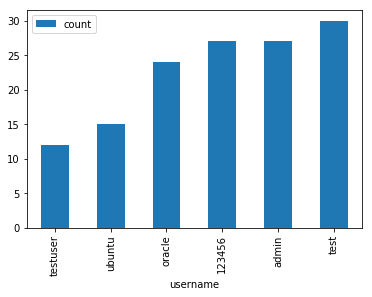

In [43]:
#user_plot = plt.bar(dframe_users["username"], dframe_users["count"], align='center')
dframe_users.groupby(['username']).median().sort_values("count").plot.bar()

In [44]:
common_ips = dframe.pivot_table(index=['ip'], aggfunc='size')
vcommon_ips = { key:value for key, value in common_ips.items() if value > 10}
print(vcommon_ips)

ip_count_list = []
for key, value in vcommon_ips.items():
    row = [key, value]
    ip_count_list.append(row)

{'1.212.62.171': 63, '101.231.201.50': 76, '101.255.56.42': 78, '103.25.6.73': 33, '103.79.154.104': 89, '106.12.61.168': 18, '112.78.134.11': 34, '119.29.170.170': 25, '128.199.179.123': 14, '129.226.57.194': 93, '138.75.78.248': 28, '143.176.195.243': 27, '162.243.121.211': 98, '164.132.24.138': 56, '175.211.216.112': 68, '176.41.4.57': 41, '177.23.196.77': 87, '179.52.99.133': 54, '190.128.230.98': 60, '190.171.149.114': 18, '211.197.207.168': 15, '219.138.156.233': 98, '31.211.65.102': 85, '41.74.112.15': 58, '47.74.148.51': 29, '71.190.234.217': 13, '85.135.87.50': 16, '87.120.36.234': 81, '87.97.116.44': 84, '88.147.148.124': 14}


In [45]:
headers_ips = ['ip','count']
dframe_ips = pd.DataFrame(ip_count_list,columns=headers_ips)
dframe_ips

,ip,count
0,1.212.62.171,63
1,101.231.201.50,76
2,101.255.56.42,78
3,103.25.6.73,33
4,103.79.154.104,89
5,106.12.61.168,18
6,112.78.134.11,34
7,119.29.170.170,25
8,128.199.179.123,14
9,129.226.57.194,93


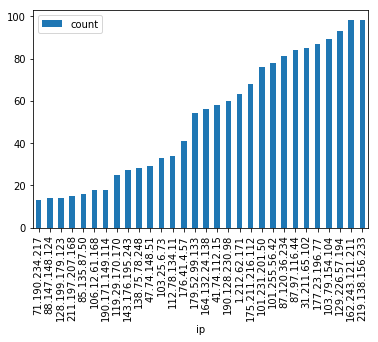

In [46]:
dframe_ips.groupby(['ip']).median().sort_values("count").plot.bar()